In [1]:
!python3 --version

Python 3.10.12


In [2]:
import numpy as np
import matplotlib.pyplot as plt
record=np.dtype([('spin', str, 20), ('ao-basis', str, 20),('System', str, 20), ('charge', int), ('unpaired', int), ('oep-basis', str, 20), ('thr_int_fai', np.float32),  ('Eigval', np.float32), ('eig_H_error', np.float32), ('eig_percent_error', np.float32), ('Hatree_Error', np.float32), ('Density_Error', np.float32), ('t_tilde_error', np.float32)])
table = np.loadtxt('table', dtype=record)
colormap = plt.cm.gist_ncar


In [4]:
thresholds, systems = [], []
for line in table:
    thresholds.append(line[6])
    systems.append(line[2]+"_C:"+str(line[3])+"_S:"+str(line[4])+"_"+line[0])

thresholds = np.sort(np.unique(thresholds))[::-1]
systems = np.sort(np.unique(systems))[::-1]


In [5]:
Eigval_Hartree_errors, Eigval_errors, Hartree_errors, Density_errors, RHS_errors, Individual_errors  = {}, {}, {}, {}, {}, {}

In [6]:
for system in systems:
    Individual_errors[system] = {}
    Individual_errors[system]['Error'] = []
    Individual_errors[system]['threshold'] = []

In [7]:
for threshold in thresholds:
    Eigval_errors[threshold], Hartree_errors[threshold], Density_errors[threshold], Eigval_Hartree_errors[threshold], RHS_errors[threshold]  = [], [], [], [], []


In [8]:
for line in table:
    Eigval_Hartree_errors[line[6]].append(line[8])
    Eigval_errors[line[6]].append(line[9])
    Hartree_errors[line[6]].append(line[10])
    Density_errors[line[6]].append(line[11])
    RHS_errors[line[6]].append(line[12])


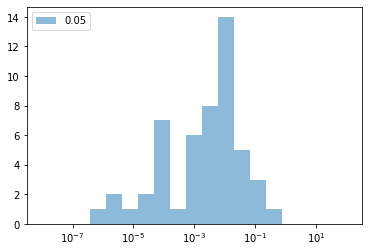

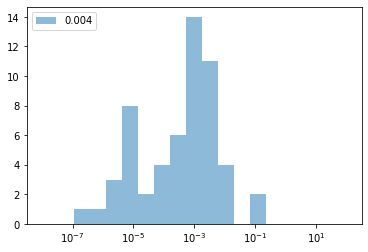

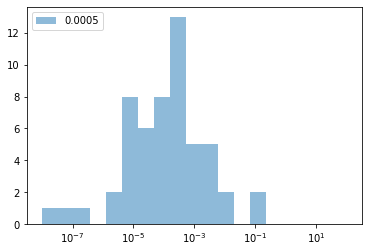

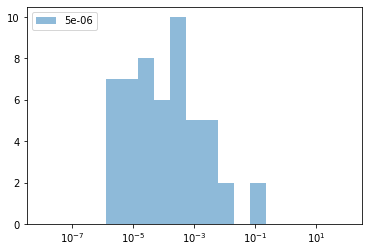

In [11]:
    for threshold in thresholds[::4]:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.hist(RHS_errors[np.float32(threshold)], bins=np.logspace(-8,2,20), alpha = 0.5, label=str(threshold))  # density=False would make counts
        ax.set_xscale('log')
        plt.legend(loc="upper left")
    plt.show()
